In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned data
df = pd.read_csv("../data/processed/ola_cleaned.csv")

In [3]:
df.shape


(103024, 18)

In [4]:
 df.head()

,Date,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,CNR7153255142,Canceled By Driver,CID713523,Prime Sedan,Tumkur Road,Rt Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,Not Completed,0,NaN,NaN
1,2024-07-25 22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,CNR2982357879,Success,CID270156,Prime Suv,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,Upi,40,4.2,4.8
3,2024-07-22 03:15:00,CNR2395710036,Canceled By Customer,CID581320,Ebike,Hsr Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,Not Completed,0,NaN,NaN
4,2024-07-02 09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0


## BOOKING STATUS BREAKDOWN

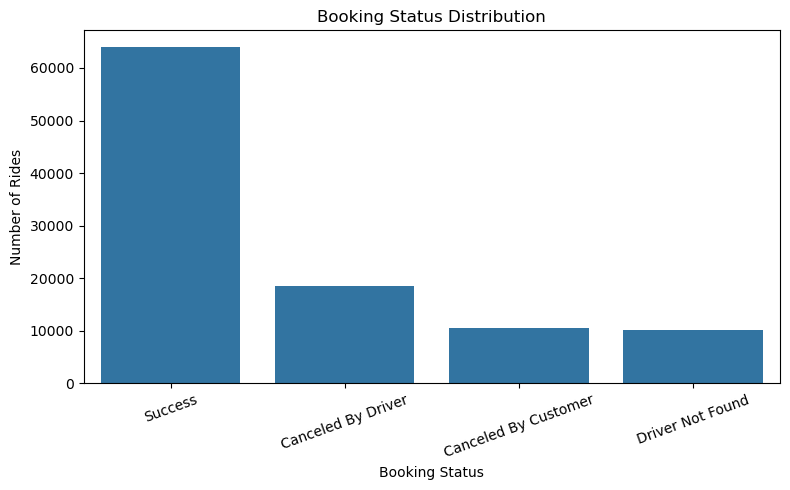

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Booking_Status',
    data=df,
    order=df['Booking_Status'].value_counts().index
)
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Number of Rides")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## RIDE VOLUME OVER TIME

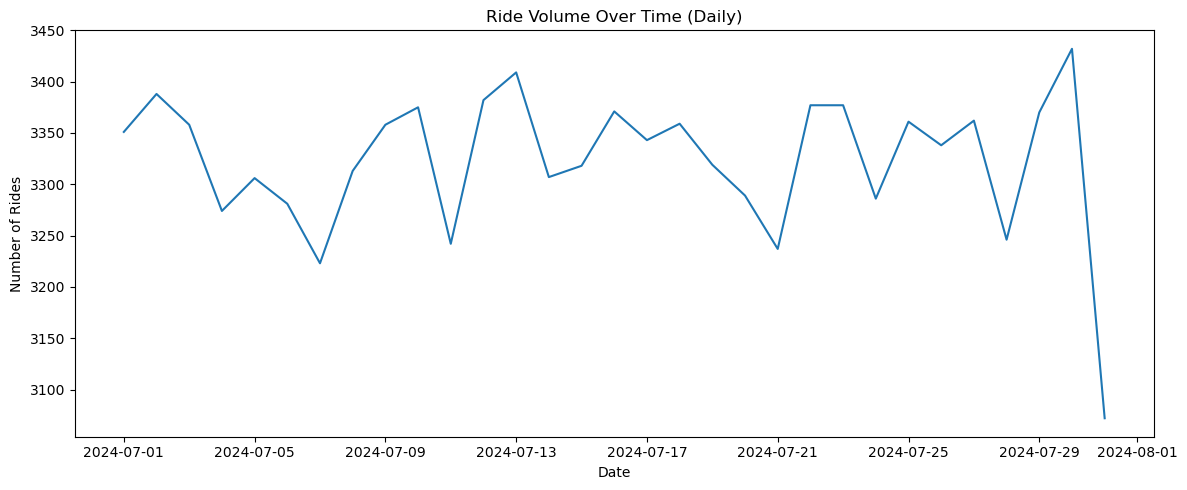

In [6]:
# Create date-only column for grouping
df['Ride_Date'] = pd.to_datetime(df['Date']).dt.date

# Aggregate ride count per day
daily_rides = df.groupby('Ride_Date').size()

plt.figure(figsize=(12, 5))
daily_rides.plot()
plt.title("Ride Volume Over Time (Daily)")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()

## VEHICLE TYPE DISTRIBUTION

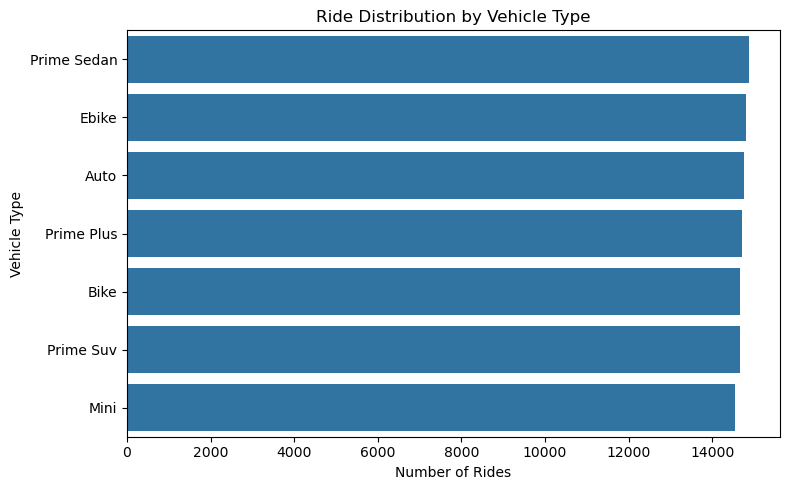

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(
    y='Vehicle_Type',
    data=df,
    order=df['Vehicle_Type'].value_counts().index
)
plt.title("Ride Distribution by Vehicle Type")
plt.xlabel("Number of Rides")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()

## REVENUE ANALYSIS

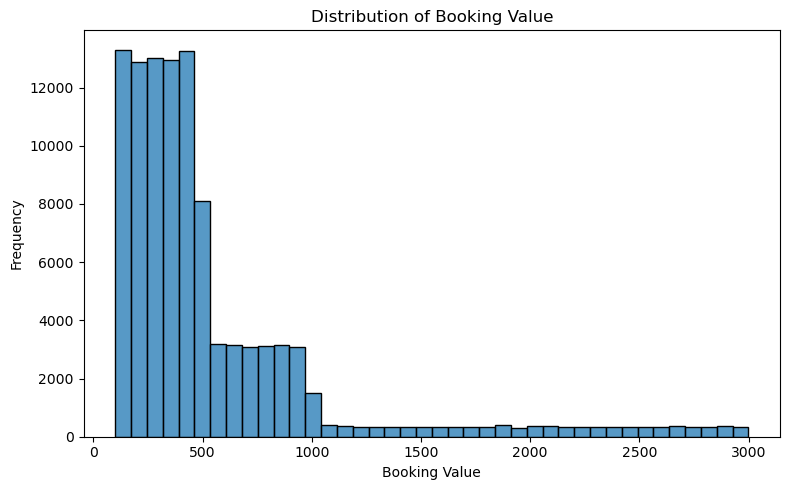

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Booking_Value'], bins=40)
plt.title("Distribution of Booking Value")
plt.xlabel("Booking Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## CANCELLATION & INCOMPLETE RIDE ANALYSIS

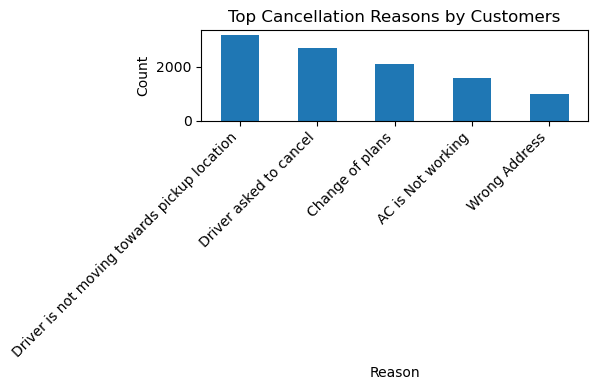

In [10]:
# Cancellation reasons by customer
plt.figure(figsize=(6, 4))
df['Canceled_Rides_by_Customer'].value_counts().head(10).plot(kind='bar')
plt.title("Top Cancellation Reasons by Customers")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

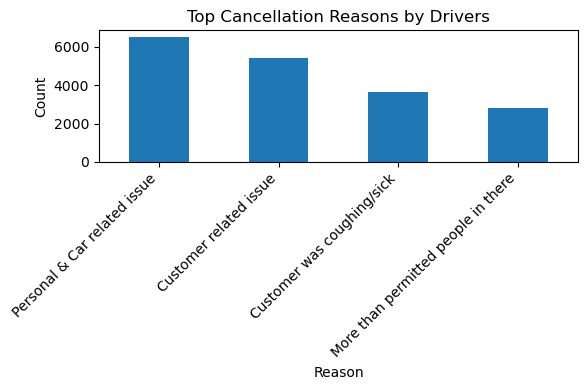

In [12]:
# Cancellation reasons by driver
plt.figure(figsize=(6, 4))
df['Canceled_Rides_by_Driver'].value_counts().head(10).plot(kind='bar')
plt.title("Top Cancellation Reasons by Drivers")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## RATINGS ANALYSIS

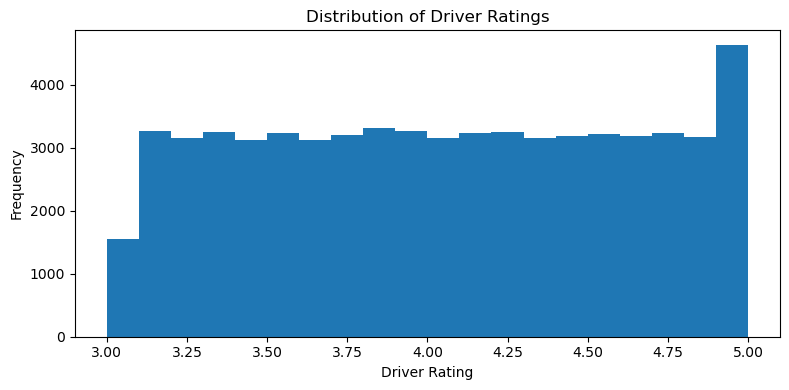

In [13]:
# Driver ratings distribution
plt.figure(figsize=(8, 4))
df['Driver_Ratings'].dropna().plot(kind='hist', bins=20)
plt.title("Distribution of Driver Ratings")
plt.xlabel("Driver Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

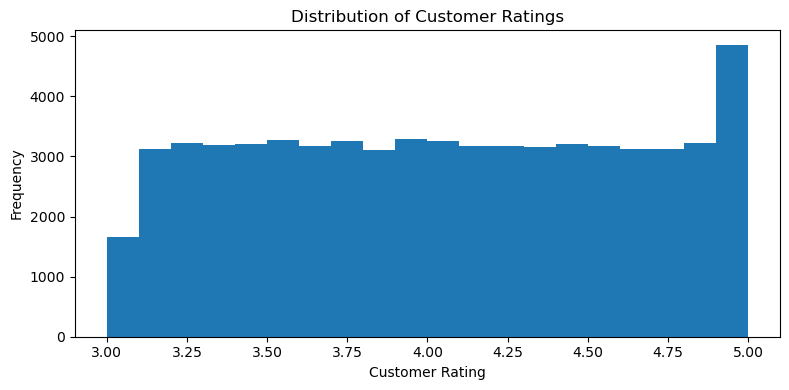

In [14]:
# Customer ratings distribution
plt.figure(figsize=(8, 4))
df['Customer_Rating'].dropna().plot(kind='hist', bins=20)
plt.title("Distribution of Customer Ratings")
plt.xlabel("Customer Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()